In [ ]:
# The C2QA package is currently not published to PyPI.
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import c2qa
import qiskit
import numpy as np
import scipy
import itertools
import c2qa.util as util
import c2qa.stateReadout as stateReadout
import matplotlib.pyplot as plt
# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from qiskit.providers.aer import AerSimulator
from qiskit import IBMQ
from collections import Counter

In [3]:
numberofmodes=2
qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes)
qbr = qiskit.QuantumRegister(size=1)
cbr = qiskit.ClassicalRegister(size=1)
circuit = c2qa.CVCircuit(qmr, qbr, cbr)
zeroQB = np.array([1, 0])  #211012 agrees with Kevin's notation
oneQB = np.array([0, 1])
one = np.array([0, 1, 0, 0])
qbinist = 1
samestallmodes = 1
qubitinitialstate = [[zeroQB, "0"], [oneQB, "1"]]
circuit.initialize(qubitinitialstate[qbinist][0], qbr[0])
for i in range(qmr.num_qumodes):
    circuit.cv_initialize(samestallmodes, qmr[i])

for i in range(numberofmodes-1):
    if (i % 2) == 0:
        circuit.cv_bs(np.arctan(1/np.sqrt(2)), qmr[i+1], qmr[i])
        circuit.cv_snap(np.pi, 2, qmr[i + 1])
        circuit.cv_cp(qmr[i],qbr[0])
        circuit.cv_bs(np.pi/4, qmr[i+1], qmr[i])
        circuit.x(qbr[0])
        circuit.cv_pncqr(-np.pi/2, 1, qmr[i],qbr[0], "Y")
        circuit.x(qbr[0])
        circuit.z(qbr[0])
        circuit.x(qbr[0])

/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


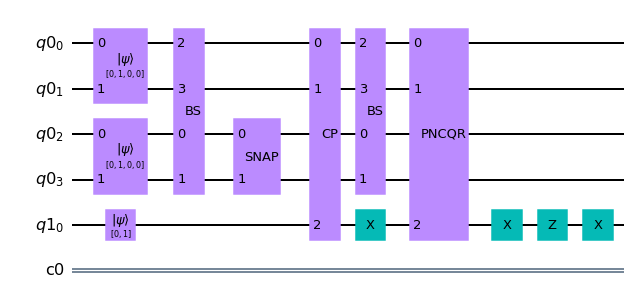

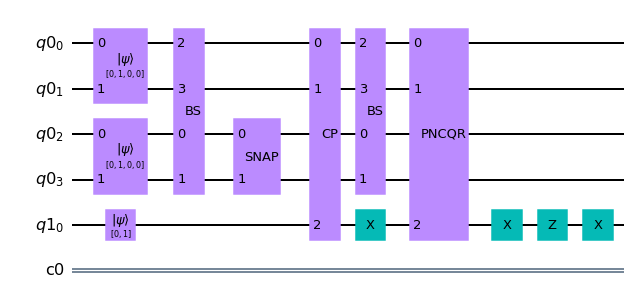

In [4]:
circuit.draw(output='mpl', filename='aklt_circuit.png')

In [5]:
stateop, _ = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)

qubits:  0  qumodes:  02     with amplitude:  0.8164965809277264
qubits:  1  qumodes:  11     with amplitude:  -0.577350269189626


In [3]:
numberofmodes=2
qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes)
qbr = qiskit.QuantumRegister(size=1)
cbr = qiskit.ClassicalRegister(size=1)
circuit = c2qa.CVCircuit(qmr, qbr, cbr)
zeroQB = np.array([1, 0])  #211012 agrees with Kevin's notation
oneQB = np.array([0, 1])
one = np.array([0, 1, 0, 0])
qbinist = 0
samestallmodes = 1
qubitinitialstate = [[zeroQB, "0"], [oneQB, "1"]]
circuit.initialize(qubitinitialstate[qbinist][0], qbr[0])
for i in range(qmr.num_qumodes):
    circuit.cv_initialize(samestallmodes, qmr[i])

for i in range(numberofmodes-1):
    if (i % 2) == 0:
        circuit.cv_bs(np.arctan(1/np.sqrt(2)), qmr[i+1], qmr[i])
        circuit.cv_snap(np.pi, 2, qmr[i + 1])
        circuit.cv_cp(qmr[i],qbr[0])
        circuit.cv_bs(np.pi/4, qmr[i+1], qmr[i])
        circuit.x(qbr[0])
        circuit.cv_pncqr(-np.pi/2, 1, qmr[i],qbr[0], "Y")
        circuit.x(qbr[0])
        circuit.z(qbr[0])
        circuit.x(qbr[0])

/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [5]:
stateop, _ = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)

qubits:  0  qumodes:  02     with amplitude:  0.8164965809277264
qubits:  1  qumodes:  11     with amplitude:  -0.577350269189626
